%matplotlib inline的作用是當你調用matplotlib.pyplot的繪圖函數plot()進行繪圖的時候，或者生成一個figure畫布的時候，可以直接在你的python console裏面生成圖像，如果你是在spyder的話就不用加這行。

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [3]:
dataset = pd.read_csv('data.csv')

print(dataset.keys())
print(dataset.columns)

Index(['Pretty Formula', 'Density', 'Band Gap'], dtype='object')
Index(['Pretty Formula', 'Density', 'Band Gap'], dtype='object')


In [4]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

print(X.shape, y.shape)
print(X[0:9])
print(y[0:9])

(501, 1) (501,)
[[0.81439573]
 [0.80753451]
 [0.81159897]
 [1.40926976]
 [1.33681125]
 [1.83476737]
 [1.72154091]
 [1.39438019]
 [1.45010264]]
[3.018  5.3418 3.6983 3.091  4.1598 4.1525 6.7187 3.7974 3.6284]


no numeric data to plot


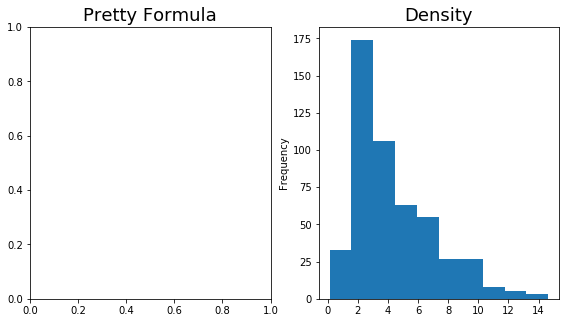

In [5]:
import math
import matplotlib.gridspec as gridspec

N = len(list(dataset.keys()))
cols = 5
rows = int(math.ceil(N / cols))
#print(N, cols, rows)

fig = plt.figure(figsize=(cols*5, rows*5), facecolor='w')
gs = gridspec.GridSpec(rows, cols)
i=0
feature=dataset[['Pretty Formula', 'Density']]
for item in feature.columns:
    ax = fig.add_subplot(gs[i])
    ax.set_title(item, fontsize=18)
    try:
        dataset[item].plot.hist()
    except TypeError:
        print("no numeric data to plot")
    finally:
        i+=1

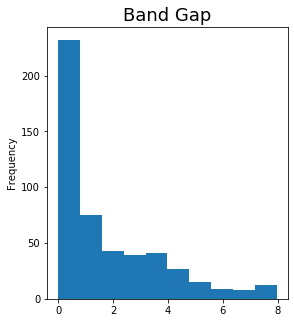

In [6]:
N = len(list(dataset.keys()))
cols = 5
rows = int(math.ceil(N / cols))
#print(N, cols, rows)

fig = plt.figure(figsize=(cols*5, rows*5), facecolor='w')
gs = gridspec.GridSpec(rows, cols)
i=0
target=dataset[['Band Gap']]
for item in target.columns:
    ax = fig.add_subplot(gs[i])
    ax.set_title(item, fontsize=18)
    try:
        dataset[item].plot.hist()
    except TypeError:
        print("no numeric data to plot")
    finally:
        i+=1

# Splitting the dataset into the Training set and Test set
![holdout](https://cdn-images-1.medium.com/max/640/1*4G__SV580CxFj78o9yUXuQ.png)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the Regression Model to the dataset

In [8]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0, )
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# Visualising the Regression results for higher and smoother curve

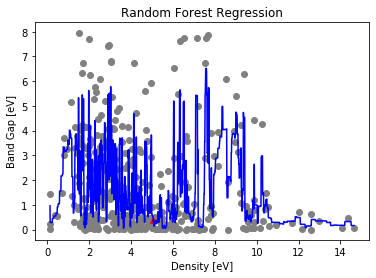

In [9]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Random Forest Regression')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
#density of MoS2 : 5.06 g/cm³
test = np.array([5.06])
test = test.reshape(len(test), 1)
#print("The caculated bandgap is: 1.8eV", )
regressor_pred=regressor.predict(test)
#print("The predictive bandgap by RandomForestRegressor is: ",y_pred)
plt.scatter(test, regressor_pred, marker='^', color='red')
plt.show()

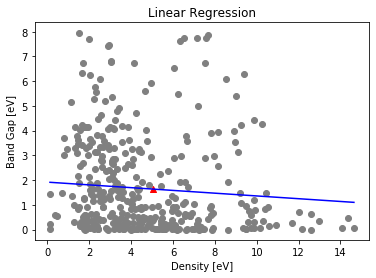

In [10]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)
lr_pred = lr.predict(test)
#print("The predictive bandgap by Linear Regression is: ",y_pred)
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_grid, lr.predict(X_grid), color='blue')
plt.title('Linear Regression')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
plt.scatter(test, lr_pred, marker='^', color='red')
plt.show()

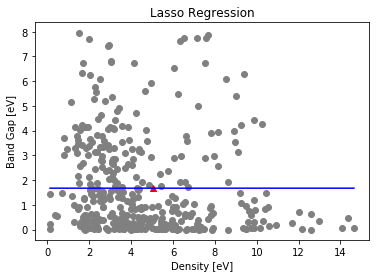

In [11]:
lasso = linear_model.Lasso()

lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(test)
#print("The predictive bandgap by Lasso Regression is: ",y_pred)
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_grid, lasso.predict(X_grid), color='blue')
plt.title('Lasso Regression')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
plt.scatter(test, lasso_pred, marker='^', color='red')
plt.show()

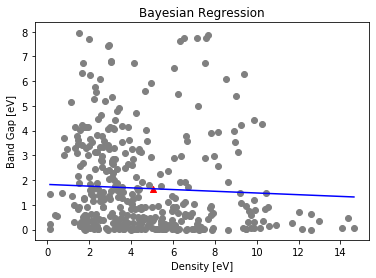

In [12]:
rr = linear_model.BayesianRidge()

rr.fit(X_train, y_train)
rr_pred = rr.predict(test)
#print("The predictive bandgap by Bayesian Regression is: ",y_pred)
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_grid, rr.predict(X_grid), color='blue')
plt.title('Bayesian Regression')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
plt.scatter(test, rr_pred, marker='^', color='red')
plt.show()

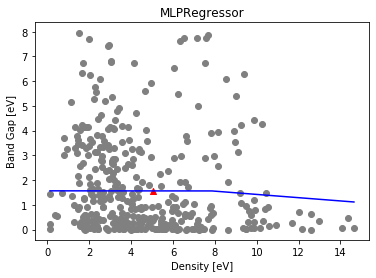

In [13]:
from sklearn.neural_network import MLPRegressor
mlpr =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlpr.fit(X_train, y_train)
mlpr_pred = mlpr.predict(test)
#print("The predictive bandgap by MLPRegressor is: ",y_pred)
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_grid, mlpr.predict(X_grid), color='blue')
plt.title('MLPRegressor')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
plt.scatter(test, mlpr_pred, marker='^', color='red')
plt.show()

In [14]:
# 整理 bandgap資料
M1 = [1.8, float(regressor_pred), float(lr_pred), float(lasso_pred), float(rr_pred), float(mlpr_pred)]
dic = {"Band Gap (unit: eV)":M1}
id = ["Calculation", "RandomForestRegressor","Linear Regression","Lasso Regression","Bayesian Regression","MLPRegressor"]
chart_result = pd.DataFrame(dic, index=id)
print("Predition by lasso regression is closer to the calculated band gap (1.8eV).")
chart_result

Predition by lasso regression is closer to the calculated band gap (1.8eV).


,Band Gap (unit: eV)
Calculation,1.800000
RandomForestRegressor,0.382198
Linear Regression,1.635509
Lasso Regression,1.673770
Bayesian Regression,1.650062
MLPRegressor,1.566218


In [15]:
# Only change the hidden layer size
pred = []
id = []
for x in range(1,10):
    mlpr = MLPRegressor(hidden_layer_sizes=(x), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
    mlpr.fit(X_train, y_train)
    y_pred = mlpr.predict(test)
    pred.append(float(y_pred))
    id.append("hidden_layer_sizes = ("+str(x)+")")
for x in range(1,10):
    for m in range(1,6):
        mlpr = MLPRegressor(hidden_layer_sizes=(x, m), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
        mlpr.fit(X_train, y_train)
        y_pred = mlpr.predict(test)
        pred.append(float(y_pred))
        id.append("hidden_layer_sizes = ("+str(x)+","+str(m)+")")
        
# 整理數據
dic = {"Band Gap (unit: eV)":pred}
chart_result = pd.DataFrame(dic, index=id)
print("When we only consider the hidden layer, it has more accurate band gap if 4 units in 1st hidden layer and 5 units in 2nd hidden layer.")
chart_result

When we only consider the hidden layer, it has more accurate band gap if 4 units in 1st hidden layer and 5 units in 2nd hidden layer.


,Band Gap (unit: eV)
hidden_layer_sizes = (1),1.488561
hidden_layer_sizes = (2),1.602622
hidden_layer_sizes = (3),1.604250
hidden_layer_sizes = (4),1.594443
hidden_layer_sizes = (5),1.602586
hidden_layer_sizes = (6),1.613385
hidden_layer_sizes = (7),1.584014
hidden_layer_sizes = (8),1.624818
hidden_layer_sizes = (9),1.623046
"hidden_layer_sizes = (1,1)",1.512293


In [16]:
# Only change the activation function
act = ['relu', 'identity', 'tanh', 'logistic']
pred = []
id = []
for x in act:
    mlpr = MLPRegressor(hidden_layer_sizes=(5, 3), activation=x, solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
    mlpr.fit(X_train, y_train)
    y_pred = mlpr.predict(test)
    pred.append(float(y_pred))
    id.append("activation function = "+str(x))

# 整理數據
dic = {"Band Gap (unit: eV)":pred}
chart_result = pd.DataFrame(dic, index=id)
print("When we only consider the activation function, it has more accurate band gap if the activation function is tanh.")
chart_result

When we only consider the activation function, it has more accurate band gap if the activation function is tanh.


,Band Gap (unit: eV)
activation function = relu,1.566218
activation function = identity,1.558328
activation function = tanh,1.644101
activation function = logistic,1.598931


In [17]:
# Only change the the learning rate
lr = [0.1, 0.01, 0.001, 0.0001, 0.00001]
pred = []
for x in lr:
    mlpr = MLPRegressor(hidden_layer_sizes=(5, 3), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=x, max_iter=10000, random_state=497)
    mlpr.fit(X_train, y_train)
    y_pred = mlpr.predict(test)
    pred.append(float(y_pred))
    id.append("learning rate = " + str(x))

# 整理數據
dic = {"Band Gap (unit: eV)":pred}
id = ["learning rate = 0.1", "learning rate = 0.01", "learning rate = 0.001", "learning rate = 0.0001", "learning rate = 0.00001"]
chart_result = pd.DataFrame(dic, index=id)
print("When we only consider the learning rate, it has more accurate band gap if the learning rate is 0.1.")
chart_result

When we only consider the learning rate, it has more accurate band gap if the learning rate is 0.1.


,Band Gap (unit: eV)
learning rate = 0.1,1.770636
learning rate = 0.01,1.658555
learning rate = 0.001,1.566218
learning rate = 0.0001,1.119091
learning rate = 0.00001,0.825987


In [18]:
# Only change the optimizer
sol = ['adam', 'lbfgs', 'sgd']
pred = []
id = []
for x in sol:
    mlpr = MLPRegressor(hidden_layer_sizes=(5, 3), activation='relu', solver=x, alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
    mlpr.fit(X_train, y_train)
    y_pred = mlpr.predict(test)
    pred.append(float(y_pred))
    id.append("optimizer = "+str(x))

# 整理數據
dic = {"Band Gap (unit: eV)":pred}
chart_result = pd.DataFrame(dic, index=id)
print("When we only consider the optimizer, it has more accurate band gap if the optimizer is lbfgs.")
chart_result

When we only consider the optimizer, it has more accurate band gap if the optimizer is lbfgs.


,Band Gap (unit: eV)
optimizer = adam,1.566218
optimizer = lbfgs,1.673770
optimizer = sgd,1.629346


In [19]:
# find best settings that the predictive band gap is closer to the calculated one in the testing data
opt = [2,1,1,'relu','adam',0.001]
for i in range(1, 10):
    for j in range(1,6):
        for k in sol:
            for m in lr:
                for n in act:
                    mlpr = MLPRegressor(hidden_layer_sizes=(i, j), activation=n, solver=k, alpha=0.0001, batch_size='auto', learning_rate_init=m, max_iter=10000, random_state=497)
                    mlpr.fit(X_train, y_train)
                    y_pred = mlpr.predict(test)
                    err = abs(y_pred-1.8)
                    if err < opt[0]:
                        opt = [float(err), i, j, n, k, m]
print(opt)

C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:105: RuntimeWarning: invalid value encountered in add
  activations[i + 1] += self.intercepts_[i]
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000

C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:151: RuntimeWarning: invalid v

C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:151: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:151: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Cheng\Anaconda3\lib\site-packa

C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:151: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_base.

C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:151: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: Run

C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Cheng\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_it

[0.002220029916788935, 3, 5, 'logistic', 'adam', 0.1]


hidden_layer_sizes = (3,5)
activation function = logistic
optimizer = adam
learning rate = 0.1
The predictive bandgap is: 1.797779970083211 eV


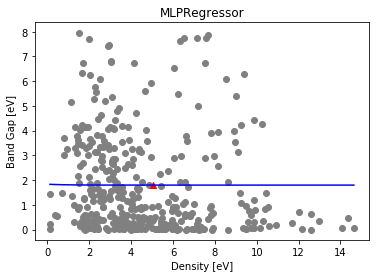

In [21]:
# best settings and result that the predictive band gap is closer to the calculated one in the testing data
mlpr = MLPRegressor(hidden_layer_sizes=(opt[1], opt[2]), activation=opt[3], solver=opt[4], alpha=0.0001, batch_size='auto', learning_rate_init=opt[5], max_iter=10000, random_state=497)
mlpr.fit(X_train, y_train)
y_pred = mlpr.predict(test)
print("hidden_layer_sizes = (" + str(opt[1]) + "," + str(opt[2]) + ")")
print("activation function = " + str(opt[3]))
print("optimizer = " + str(opt[4]))
print("learning rate = " + str(opt[5]))
print("The predictive bandgap is: " + str(float(y_pred)) + " eV")
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_grid, mlpr.predict(X_grid), color='blue')
plt.title('MLPRegressor')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
plt.scatter(test, y_pred, marker='^', color='red')
plt.show()